# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [35]:
# Libraries
import numpy as np
import pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [36]:
# your code here
fitbit=pd.read_csv(r'C:\Users\alexd\Ironhack\Labs\5.2-lab-matplotlib-seaborn\data\Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [37]:
plt.rcParams['figure.figsize']=(12, 4) 

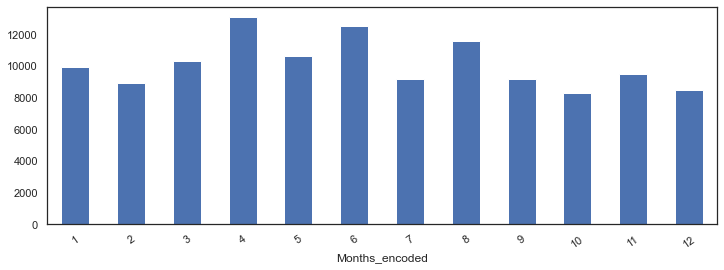

In [38]:
# AVERAGE STEPS BY MONTH_ENCODED

fitbit.groupby('Months_encoded').mean().Steps.plot(kind='bar')
plt.xticks(rotation=35);

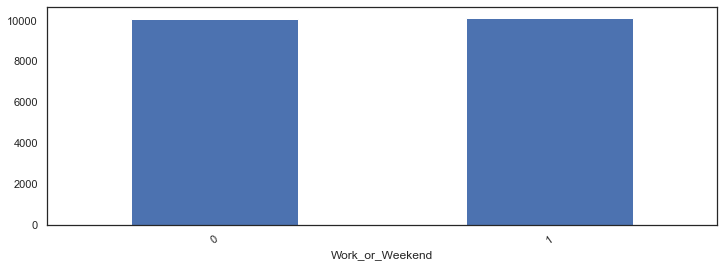

In [39]:
# AVERAGE STEPS BY WORK_OR_WEEKEND

fitbit.groupby('Work_or_Weekend').mean().Steps.plot(kind='bar')
plt.xticks(rotation=35);

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [40]:
list=['Minutes Lightly Active', 'Minutes Very Active','Minutes Sedentary']    


C:\Users\alexd\Downloads\DescargaAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alexd\Downloads\DescargaAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alexd\Downloads\DescargaAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

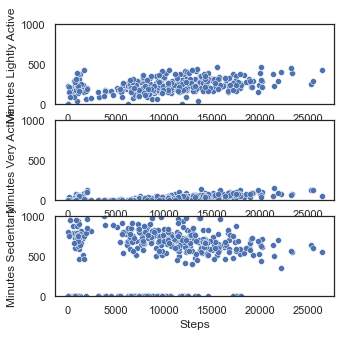

In [71]:
count=1
for e in list:
    plt.subplot(3,1,count)
    sns.scatterplot(fitbit["Steps"],fitbit[e])
    count+=1
    plt.ylim(0, 1000)
    plt.rcParams['figure.figsize']=(5,5) 

plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [42]:
titanic=pd.read_csv(r'C:\Users\alexd\Ironhack\Labs\5.2-lab-matplotlib-seaborn\data\titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [43]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [44]:
# NUMERICAL VARIABLES
titanic._get_numeric_data().head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [45]:
# CATEGORICAL VARIABLES
titanic.select_dtypes('object').head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [46]:
plt.rcParams['figure.figsize']=(12, 6) 

#### Use the right visulalization to show the distribution of column `Age`.

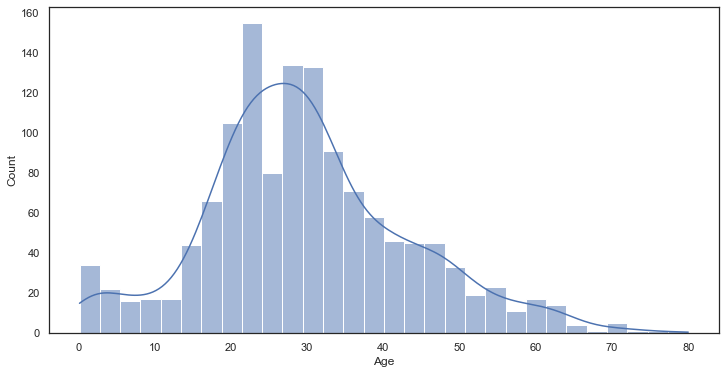

In [47]:
sns.histplot(x=titanic.Age, 
             kde=True
            );

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

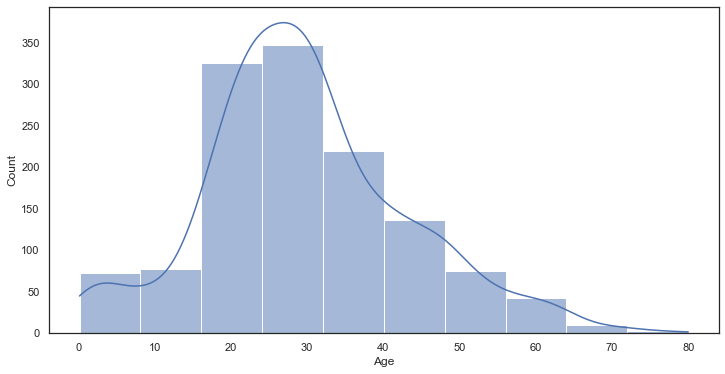

In [48]:
sns.histplot(x=titanic.Age, 
             bins=10,
             kde=True
            );

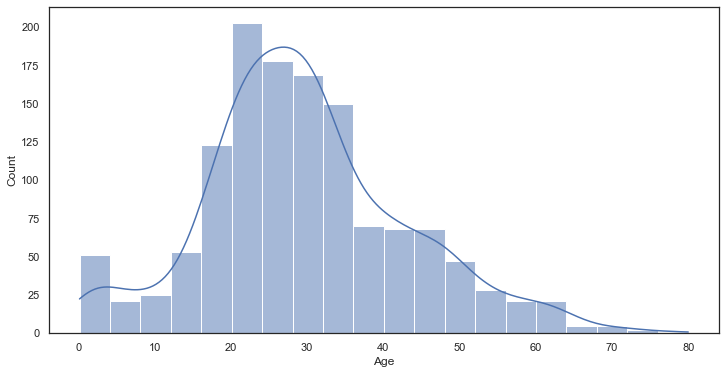

In [49]:
sns.histplot(x=titanic.Age, 
             bins=20,
             kde=True
            );

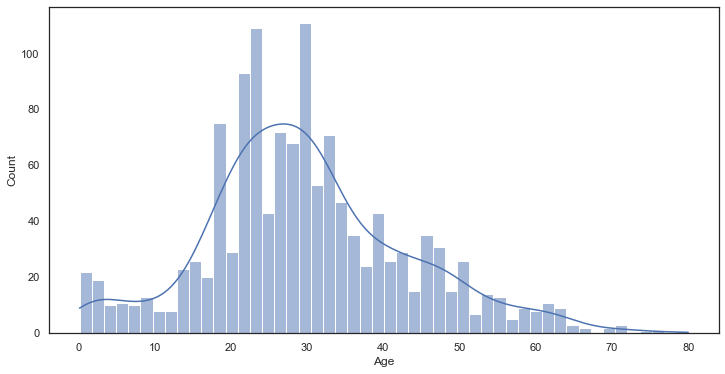

In [50]:
sns.histplot(x=titanic.Age, 
             bins=50,
             kde=True
            );

#### How does the bin size affect your plot?

In [51]:
"""
your comments here
"""

# The count axis (y) gets bigger when the bins are less. This is because it sums more intervals of age. But distribution is equal.

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

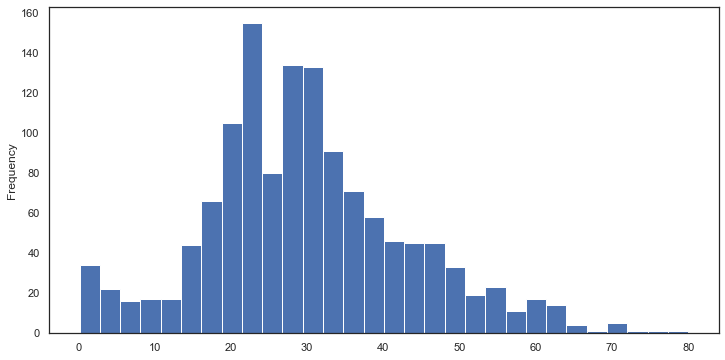

In [52]:
# your code here


 # Como antes he hecho seaborn, ahora te pongo Pandas.

titanic.Age.plot.hist(bins=30, stacked=True);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

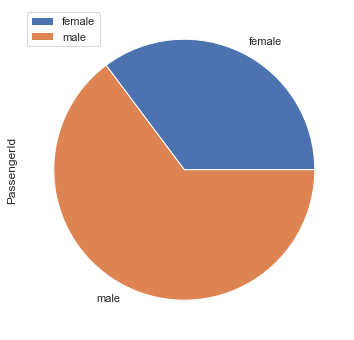

In [53]:
# Method 1 - matplotlib
titanic.groupby(['Gender']).sum().plot(kind='pie', y='PassengerId');

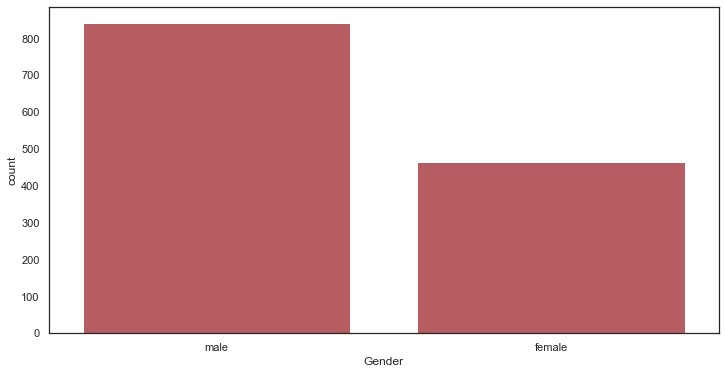

In [54]:
# Method 2 - seaborn
sns.countplot(x=titanic.Gender, color='r');

#### Use the right plot to visualize the column `Pclass`.

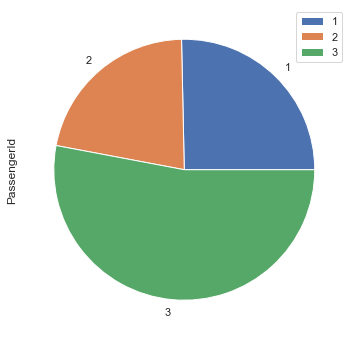

In [55]:
# your code here
titanic.groupby(['Pclass']).sum().plot(kind='pie', y='PassengerId');

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

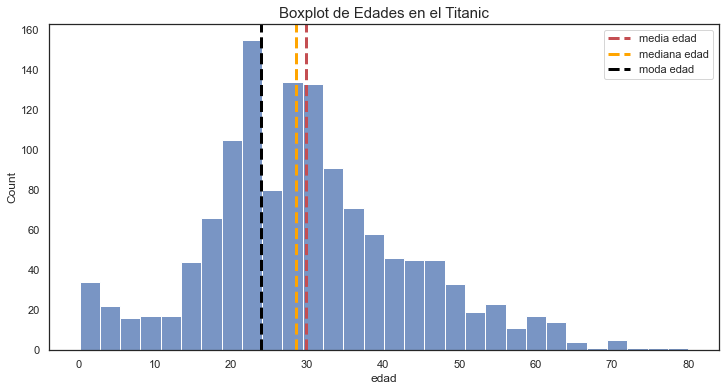

In [56]:
# your code here

sns.histplot(x=titanic.Age)

plt.axvline(titanic.Age.mean(),
            c='r',
            linewidth= 3.,
            linestyle='--',
            label='media edad')     # línea vertical de la media


plt.axvline(titanic.Age.median(),
            c='orange',
            linewidth= 3.,
            linestyle='--',
            label='mediana edad')     # línea vertical de la mediana


plt.axvline(titanic.Age.mode()[0],
            c='black',
            linewidth= 3.,
            linestyle='--',
            label='moda edad')     # línea vertical de la moda


plt.title('Boxplot de Edades en el Titanic', size=15)
plt.xlabel('edad')
plt.legend()
plt.show();

In [57]:
"""
your comments here
"""

# ploteamos un gráfico con todas las medidas.En el vemos un histograma con la estadistica descriptiva y de posición.

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [58]:
"""
your comments here

"""

# Es asimetrica positiva. Tendencia a valores extremos por lo alto

'\nyour comments here\n\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

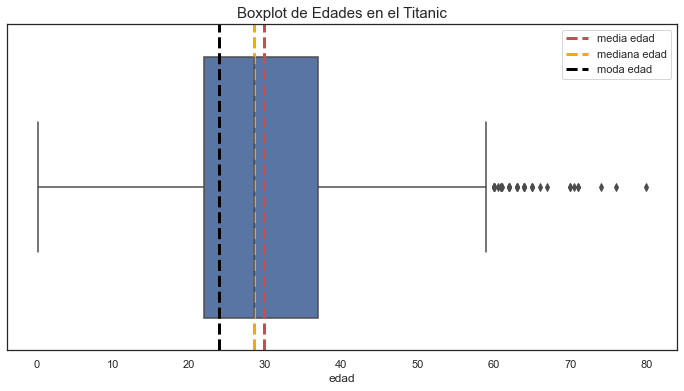

In [59]:
sns.boxplot(x=titanic.Age)


plt.axvline(titanic.Age.mean(),
            c='r',
            linewidth= 3.,
            linestyle='--',
            label='media edad')     # línea vertical de la media


plt.axvline(titanic.Age.median(),
            c='orange',
            linewidth= 3.,
            linestyle='--',
            label='mediana edad')     # línea vertical de la mediana


plt.axvline(titanic.Age.mode()[0],
            c='black',
            linewidth= 3.,
            linestyle='--',
            label='moda edad')     # línea vertical de la moda


plt.title('Boxplot de Edades en el Titanic', size=15)
plt.xlabel('edad')
plt.legend()
plt.show();


#### What additional information does the last plot provide about feature `Age`?

In [60]:
"""
your comments here
"""

# gente mayor considerada outliers. Habría pocos pasajeos viejunos en el barco.

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

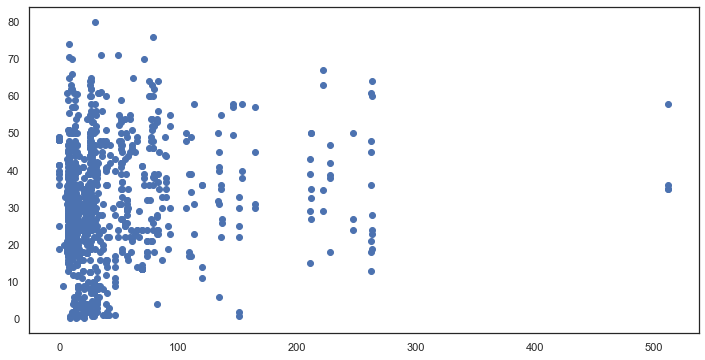

In [61]:
# Method 1 - matplotlib
plt.scatter(x='Fare', y='Age', data=titanic);

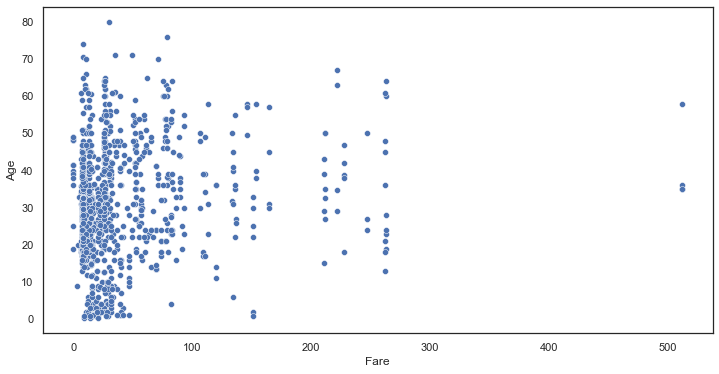

In [62]:
# Method 2 - seaborn
sns.scatterplot(data=titanic,
                x='Fare', 
                y='Age');

#### Plot the correlation matrix using seaborn.

In [63]:
corr=titanic.corr(method='pearson')
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


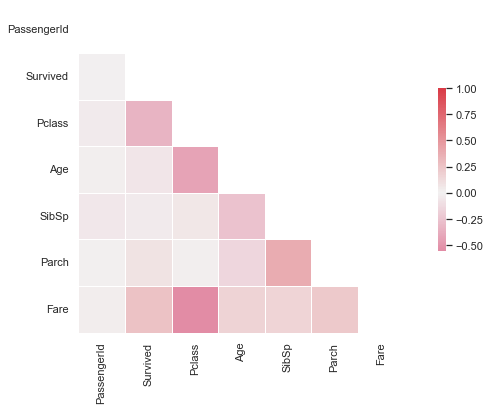

In [64]:

sns.set(style='white')


mascara=np.triu(np.ones_like(corr, dtype=bool))


cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5}
           );

#### What are the most correlated features?

In [65]:
"""
your comments here
"""

# La más correacionada son la tarifa(Fare) con la clase(Pclass) con una correlación de -0.558683. Tarifa más barata si la clase es peor Lógico.

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

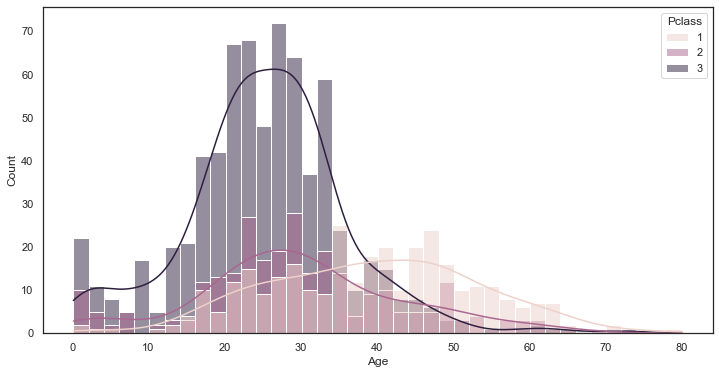

In [66]:
sns.histplot(x=titanic.Age, 
             hue=titanic.Pclass,
             bins=40,
             kde=True
            );


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

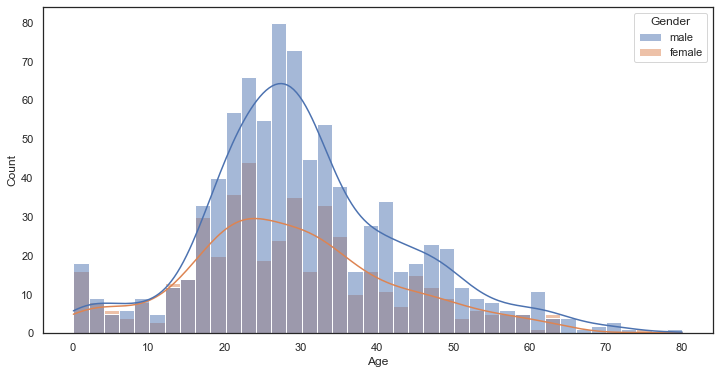

In [67]:
sns.histplot(x=titanic.Age, 
             hue=titanic.Gender,
             bins=40,
             kde=True
            );


In [68]:
plt.savefig('figures/age_gender.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'figures/age_gender.jpg'

<Figure size 864x432 with 0 Axes>